# IBM Data Science Capstone Project
## Title:   Analysing London Boroughs
## Author:  Jake Smith

### 1. Introduction

#### 1.1 Background

London is a large, diverse city in the United Kingdom. Its scope in terms of geography can be defined in different ways, though typically it is divided into 32 London boroughs along with the City of London district. This area is often referred to as Greater London and covers an area of 1572 square kilometres.

London has a large resident population of approximately 9 million inhabitants. In addition to this, a vast number of tourists visit the city each year; over 20 million international visitors were received in 2018. Tourism is a key industry for the economy of the city, and this is emphasised by the fact that tourists who visited London in 2011 were estimated to spend £9.4 billion [1].

#### 1.2 Description of business problem

The resident population of London, in combination with tourists who visit each year, offer lucrative opportunities for the hospitality industry. The business problem I will address in this project is related to this; can specific boroughs within the city be identified as suitable locations to set up a new craft beer bar?

For someone wishing to set up a new hospitality business venture such as this, a key concern would be the frequency that various types of business can be found across different neighbourhoods. When setting up a new bar, an individual would most likely want to know that the location that they identify is in an area in which hospitality businesses are popular and therefore can thrive. Another important factor is knowing where the most popular tourist areas are. This can be assessed in terms of the total tourist traffic they experience per year; a reasonable assumption to make is that areas more popular with tourists are likely to generate more income for hospitality businesses. Investigating both factors can help to identify areas in London that have the right target market.

To address this business problem, I will create a data frame that combines borough names, latitude and longitude coordinates for each borough scraped from Wikipedia, the 10 most commonly found venues in each borough taken from the Foursquare API, tourist trip data sourced from data websites, and finally a geo json file that marks out the separate London boroughs. The boroughs are to be clustered using the unsupervised machine learning technique of K-Means clustering according to the most commonly found venues. This data frame will be used to create an interactive map with Folium that visualises both venue data and tourist trip data for each borough. It will take the form of a choropleth map, which is an ideal way to visualise the different levels of tourist trips across the boroughs, with coloured labels indicating how the boroughs are clustered based on the frequency with which different venues are found. The labels will also provide descriptive information including cluster descriptions and the popularity of each borough with tourists based on categories.

#### 1.3. Interest in the problem

This business problem is likely to be of interest to anyone who intends to enter the hospitality industry in London, specifically bars, pubs, and other types of drinking establishment. Similarly, those who already have a hospitality business but are considering expanding into more locations would find this information useful.

This information would also be interesting for tourists who want to gain a good idea of the different areas in London before they visit, including popularity of each borough alongside the typical venues they are likely to encounter in different places.

### 2. Data

#### 2.1. Data description and sources

+ The names, latitude and longitude co-ordinates of each London Borough and the City of London district (which is not officially classed as a borough even though it is in central London) will be sourced by web scraping from Wikipedia using BeautifulSoup [2].

+ The Foursquare API will be used to obtain the most common types of venue found within the different London boroughs [3].

+ Tourism trips to each London borough (thousands per year) for the year 2007 is to be sourced from the UK government data website [4].

+ Geo json data that marks out the boundaries for each London borough will be used to create a choropleth map; this is to be sourced from London Data Store website [5].

### 3. Methodology

#### 3.1 Webscrape London borough information from Wikipedia

First install necessary packages/libraries:

In [2]:
!pip install bs4
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
print("Libraries imported!")

Libraries imported!


Create a url variable from the London boroughs wikipedia page and use this to create html_data variable:

In [3]:
borough_url = "https://en.wikipedia.org/wiki/List_of_London_boroughs"
html_data = requests.get(borough_url).text

Create BeautifulSoup object using the html_data variable:

In [4]:
soup = BeautifulSoup(html_data,"html5lib")

Create object called tables that stores all the table information from the soup object:

In [5]:
tables = soup.find_all('table')

Create a pandas dataframe from the first table and drop unneeded columns, leaving just Borough and Co-ordinates.

Check the shape of the dataframe to ensure there are 32 boroughs and that the data looks correct compared to the wikipedia page:

In [6]:
london_boroughs = pd.read_html(str(tables[0]), flavor='bs4')[0]
london_boroughs.drop(['Inner', 'Status', 'Local authority', 'Political control','Headquarters', 'Area (sq mi)', 'Population (2019 est)[1]','Nr. in map'], axis=1, inplace=True)
print(london_boroughs.shape)
london_boroughs

(32, 2)


,Borough,Co-ordinates
0,Barking and Dagenham [note 1],".mw-parser-output .geo-default,.mw-parser-outp..."
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E
5,Camden,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W
6,Croydon,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W
7,Ealing,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W
8,Enfield,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W
9,Greenwich [note 2],51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E


As information for the City of London is found in a separate table, follow the same scraping steps but for the next table:

In [7]:
cityoflondon = pd.read_html(str(tables[1]), flavor='bs4')[0]
cityoflondon.drop(['Inner', 'Status', 'Local authority', 'Political control','Headquarters', 'Area (sq mi)', 'Population(2019 est)','Nr. inmap'], axis=1, inplace=True)
print(cityoflondon.shape)
cityoflondon

(1, 2)


,Borough,Co-ordinates
0,City of London,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W


Append the City of London data to the london boroughs dataframe:

In [8]:
london_boroughs = london_boroughs.append(cityoflondon, ignore_index=True)
london_boroughs

,Borough,Co-ordinates
0,Barking and Dagenham [note 1],".mw-parser-output .geo-default,.mw-parser-outp..."
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E
5,Camden,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W
6,Croydon,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W
7,Ealing,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W
8,Enfield,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W
9,Greenwich [note 2],51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E


In [9]:
print(london_boroughs.shape)

(33, 2)


Clean the Borough column so that names do not contain unwated text or spaces:

In [10]:
london_boroughs['Borough'] = london_boroughs['Borough'].str.replace('[', '').str.replace(']', '').str.replace('1', '').str.replace('2', '').str.replace('4', '').str.replace('note', '').str.rstrip()
london_boroughs

,Borough,Co-ordinates
0,Barking and Dagenham,".mw-parser-output .geo-default,.mw-parser-outp..."
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E
5,Camden,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W
6,Croydon,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W
7,Ealing,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W
8,Enfield,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W
9,Greenwich,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E


Split the Co-ordinates column as it contains co-ordinates in two different formats.

Firstly by separating the two formats of co-ordinates into new columns, then by splitting the new DegreesDecimal format into separate Latitude and Logitude columns:

In [11]:
london_boroughs[['DegreesMinSec', 'DegreesDecimal']] = london_boroughs['Co-ordinates'].str.split("/",expand=True,)
london_boroughs[['Latitude', 'Longitude']] = london_boroughs['DegreesDecimal'].str.split("°N ",expand=True,)
london_boroughs['Longitude'] = london_boroughs['Longitude'].str.replace('°E', '').str.replace('°W', '')
london_boroughs.head()

,Borough,Co-ordinates,DegreesMinSec,DegreesDecimal,Latitude,Longitude
0,Barking and Dagenham,".mw-parser-output .geo-default,.mw-parser-outp...",".mw-parser-output .geo-default,.mw-parser-outp...",﻿51.5607°N 0.1557°E,﻿51.5607,0.1557
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W,﻿51.6252,0.1517
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E,﻿51.4549,0.1505
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W,﻿51.5588,0.2817
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E,﻿51.4039,0.0198


Ensure that all Longitudes that are identified as degrees West in DegreesDecimal are correct format with a '-' before the coordinate:

In [12]:
london_boroughs.loc[london_boroughs['DegreesDecimal'].str.contains('W'), 'Longitude'] = "-" + london_boroughs['Longitude']
london_boroughs.head()

,Borough,Co-ordinates,DegreesMinSec,DegreesDecimal,Latitude,Longitude
0,Barking and Dagenham,".mw-parser-output .geo-default,.mw-parser-outp...",".mw-parser-output .geo-default,.mw-parser-outp...",﻿51.5607°N 0.1557°E,﻿51.5607,0.1557
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W,﻿51.6252,-0.1517
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E,﻿51.4549,0.1505
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W,﻿51.5588,-0.2817
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E,﻿51.4039,0.0198


Drop unneeded columns leaving just Borough, Latitude and Longitude:

In [13]:
london_boroughs.drop(['Co-ordinates', 'DegreesMinSec', 'DegreesDecimal'], axis=1, inplace=True)
london_boroughs.head()

,Borough,Latitude,Longitude
0,Barking and Dagenham,﻿51.5607,0.1557
1,Barnet,﻿51.6252,-0.1517
2,Bexley,﻿51.4549,0.1505
3,Brent,﻿51.5588,-0.2817
4,Bromley,﻿51.4039,0.0198


Replace any special characters so that latitude and longitude can be converted to float data type:

In [14]:
london_boroughs['Latitude'] = london_boroughs['Latitude'].str.replace(r"[^0-9.-]",'')
london_boroughs['Longitude'] = london_boroughs['Longitude'].str.replace(r"[^0-9.-]",'')
print(london_boroughs.dtypes)
london_boroughs.head()

Borough      object
Latitude     object
Longitude    object
dtype: object


,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


In [15]:
london_boroughs['Latitude'] = pd.to_numeric(london_boroughs['Latitude'],errors = 'coerce')
london_boroughs['Longitude'] = pd.to_numeric(london_boroughs['Longitude'],errors = 'coerce')
print(london_boroughs.dtypes)
london_boroughs.head()

Borough       object
Latitude     float64
Longitude    float64
dtype: object


,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


#### 3.2 Join tourist trips data

Create url object from tourist trips data csv file stored on my github and then read into a new dataframe called trips:

In [16]:
trips_url = 'https://raw.githubusercontent.com/jakehuntersmith/Coursera_Capstone/main/data/tourism-trips-borough.csv'
trips = pd.read_csv(trips_url)
trips.head()

,Borough,OverseasTrips(thousands),DomesticStayTrips(thousands),DayTrips(thousands)
0,Barking and Dagenham,66,45,"1,029"
1,Barnet,303,171,"6,695"
2,Bexley,151,102,"2,237"
3,Brent,182,114,"2,711"
4,Bromley,243,143,"3,978"


There are three categories of trips; domestic Overseas Trips, Domestic Stay Trips and Day Trips, all of which are measured in thousands.

Check data types:

In [17]:
trips.dtypes

Borough                         object
OverseasTrips(thousands)        object
DomesticStayTrips(thousands)    object
DayTrips(thousands)             object
dtype: object

Remove commas and change data type for columns with numeric values to integer:

In [18]:
trips["OverseasTrips(thousands)"] = trips["OverseasTrips(thousands)"].str.replace(',', '').astype("int")
trips["DomesticStayTrips(thousands)"] = trips["DomesticStayTrips(thousands)"].str.replace(',', '').astype("int")
trips["DayTrips(thousands)"] = trips["DayTrips(thousands)"].str.replace(',', '').astype("int")
print(trips.dtypes)
trips.head()

Borough                         object
OverseasTrips(thousands)         int64
DomesticStayTrips(thousands)     int64
DayTrips(thousands)              int64
dtype: object


,Borough,OverseasTrips(thousands),DomesticStayTrips(thousands),DayTrips(thousands)
0,Barking and Dagenham,66,45,1029
1,Barnet,303,171,6695
2,Bexley,151,102,2237
3,Brent,182,114,2711
4,Bromley,243,143,3978


Create a total trips column by summing the three separate trip columns:

In [19]:
trips['TotalTrips'] = trips.iloc[: , [1, 2, 3]].sum(axis=1)
print(trips.dtypes)
trips.head()

Borough                         object
OverseasTrips(thousands)         int64
DomesticStayTrips(thousands)     int64
DayTrips(thousands)              int64
TotalTrips                       int64
dtype: object


,Borough,OverseasTrips(thousands),DomesticStayTrips(thousands),DayTrips(thousands),TotalTrips
0,Barking and Dagenham,66,45,1029,1140
1,Barnet,303,171,6695,7169
2,Bexley,151,102,2237,2490
3,Brent,182,114,2711,3007
4,Bromley,243,143,3978,4364


Join london_boroughs and trips dataframes into new dataframe called 'london':

In [20]:
london = london_boroughs.join(trips.set_index('Borough'), on="Borough")
london.head()

,Borough,Latitude,Longitude,OverseasTrips(thousands),DomesticStayTrips(thousands),DayTrips(thousands),TotalTrips
0,Barking and Dagenham,51.5607,0.1557,66,45,1029,1140
1,Barnet,51.6252,-0.1517,303,171,6695,7169
2,Bexley,51.4549,0.1505,151,102,2237,2490
3,Brent,51.5588,-0.2817,182,114,2711,3007
4,Bromley,51.4039,0.0198,243,143,3978,4364


Drop individual trips columns leaving just total trips:

In [21]:
london.drop(['OverseasTrips(thousands)', 'DomesticStayTrips(thousands)', 'DayTrips(thousands)'], axis=1, inplace=True)
london.head()

,Borough,Latitude,Longitude,TotalTrips
0,Barking and Dagenham,51.5607,0.1557,1140
1,Barnet,51.6252,-0.1517,7169
2,Bexley,51.4549,0.1505,2490
3,Brent,51.5588,-0.2817,3007
4,Bromley,51.4039,0.0198,4364


In [22]:
print(london.dtypes)

Borough        object
Latitude      float64
Longitude     float64
TotalTrips      int64
dtype: object


#### 3.3 Create folium map that displays London map with boroughs identified:

Import required packages for sourcing venue information, visualising with Folium, and running K-means clustering analysis:

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
!conda install -c conda-forge folium=0.5.0 --yes
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import json
from pandas.io.json import json_normalize
print('Libraries imported!')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported!


Use geolocator to source the coordinates of London:

In [25]:
address = 'London, England'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical co-ordinates of London are {}, {}.'.format(latitude, longitude))

The geograpical co-ordinates of London are 51.5073219, -0.1276474.


Create map of London then add markers for the boroughs stored in the london dataframe:

In [26]:
map_london = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, borough in zip(london['Latitude'], london['Longitude'], london['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

#### 3.4 Source venue information for each borough using Foursquare API

Store Foursquare credentials and version:

In [27]:
CLIENT_ID = '3QWZRJM0J0CXOHIFAPXYG2IVAKTA43M0FJIDA5ZRHND0HVRE'
CLIENT_SECRET = '5SKV3M4TPP44PYCWASQZNAQQPQXJ1KKSF5K0H4WFHAAH24FB'
VERSION = '20180605'
LIMIT = 100

Define a function to cycle through each London borough using the explore request of the Foursquare API, sourcing venue information about each with a radius of 1000 metres:

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Use the function to get nearby venues for each London neighborhood, check the size of the new dataframe and how many unique categories there are:

In [29]:
london_venues = getNearbyVenues(names=london['Borough'], latitudes=london['Latitude'], longitudes=london['Longitude'])
print(london_venues.shape)
print('There are {} unique categories.'.format(len(london_venues['Venue Category'].unique())))
london_venues.head()

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster
City of London
(2307, 7)
There are 264 unique categories.


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Lara Grill,51.562445,0.147178,Turkish Restaurant
2,Barking and Dagenham,51.5607,0.1557,Iceland,51.560578,0.147685,Grocery Store
3,Barking and Dagenham,51.5607,0.1557,Shell,51.560415,0.148364,Gas Station
4,Barking and Dagenham,51.5607,0.1557,B&M Store,51.565287,0.143793,Discount Store


Check how many venues are returned in each borough and sort them:

In [30]:
venues_count = london_venues.groupby('Borough').count().reset_index()
venues_count['Count'] = venues_count['Venue']
venues_count = venues_count.drop(['Borough Latitude', 'Borough Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
venues_count = venues_count.sort_values('Count').reset_index(drop=True)
venues_count

,Borough,Count
0,Barnet,9
1,Barking and Dagenham,13
2,Merton,29
3,Waltham Forest,38
4,Newham,39
5,Lewisham,42
6,Harrow,43
7,Bexley,46
8,Redbridge,46
9,Sutton,50


Visualise the number of venues returned for each borough:

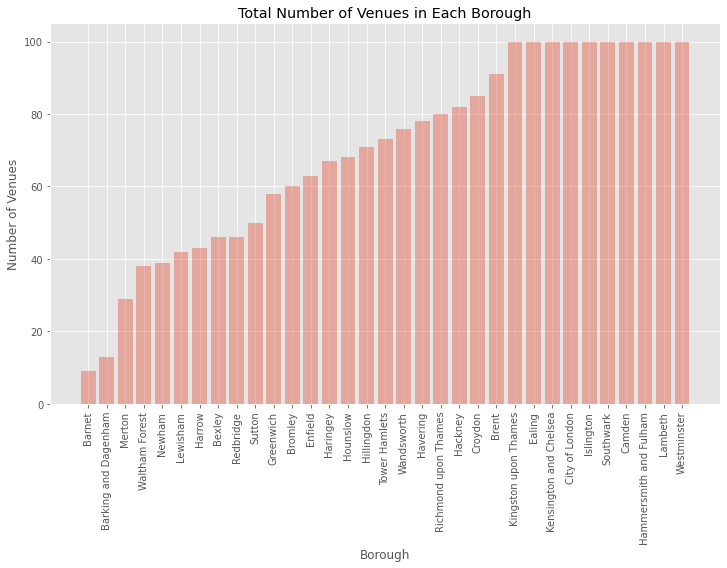

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

objects = venues_count.Borough
y_pos = np.arange(len(objects))
performance = venues_count.Count

plt.figure(figsize=(12,7))
plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Venues')
plt.xlabel('Borough')
plt.title('Total Number of Venues in Each Borough')
plt.xticks(rotation=90)

plt.show()

#### 3.5 Determine the most common venues for each borough

Use one hot encoding to determine the frequency of occurance of each venue category within each borough:

In [32]:
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")
london_onehot['Borough'] = london_venues['Borough'] 
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
print(london_grouped.shape)
london_grouped.head()

(33, 265)


,Borough,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Chaat Place,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Doner Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Palace,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,River,Rock Club,Romanian Restaurant,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Scottish Restaurant,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoothie Shop,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Taxi Stand,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Tree,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Windmill,Wine Bar,Wine Shop,Winery,Yoga Studio
0,Barking and Dagenham,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.153846,0.0,0.00000

Define function that sorts venues into descending order:

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

Create new dataframe with top 10 venues for each borough based on frequency:

In [48]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['Borough']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

london_venues_sorted = pd.DataFrame(columns=columns)
london_venues_sorted['Borough'] = london_grouped['Borough']

for ind in np.arange(london_grouped.shape[0]):
    london_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

london_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Bus Stop,Turkish Restaurant,Supermarket,Discount Store,Golf Course,Soccer Field,Grocery Store,Gas Station,Gym / Fitness Center,Park
1,Barnet,Pub,Park,Bus Stop,Fish & Chips Shop,Gym,Café,Electronics Store,English Restaurant,Escape Room,Exhibit
2,Bexley,Pub,Clothing Store,Fast Food Restaurant,Hotel,Supermarket,Coffee Shop,Pharmacy,American Restaurant,Nightclub,Pizza Place
3,Brent,Coffee Shop,Hotel,Bar,Clothing Store,Grocery Store,Pub,Pizza Place,Sporting Goods Shop,Indian Restaurant,American Restaurant
4,Bromley,Pub,Clothing Store,Coffee Shop,Indian Restaurant,Supermarket,Café,Bar,Pizza Place,Electronics Store,Burger Joint


#### 3.6 Cluster the boroughs through K-Means

Clustering to be based on the K-Means algorithm, an unsupervised method of machine learning.

From cycling through different values for k and sense checking, the optimum k value looks to be 3:

In [49]:
kclusters = 3
london_grouped_clustering = london_grouped.drop('Borough', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)
labels = kmeans.labels_
labels

array([0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2], dtype=int32)

#### 3.7 Add the cluster values to the dataframe and visualise

Create new dataframe that combines the original location data for london boroughs with the cluster values and most common venues:

In [50]:
london_venues_sorted.insert(0, 'Cluster Value', kmeans.labels_)
london_boroughs_clusters = london
london_boroughs_clusters = london_boroughs_clusters.join(london_venues_sorted.set_index('Borough'), on='Borough')
london_boroughs_clusters.head()

,Borough,Latitude,Longitude,TotalTrips,Cluster Value,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,51.5607,0.1557,1140,0,Bus Stop,Turkish Restaurant,Supermarket,Discount Store,Golf Course,Soccer Field,Grocery Store,Gas Station,Gym / Fitness Center,Park
1,Barnet,51.6252,-0.1517,7169,1,Pub,Park,Bus Stop,Fish & Chips Shop,Gym,Café,Electronics Store,English Restaurant,Escape Room,Exhibit
2,Bexley,51.4549,0.1505,2490,1,Pub,Clothing Store,Fast Food Restaurant,Hotel,Supermarket,Coffee Shop,Pharmacy,American Restaurant,Nightclub,Pizza Place
3,Brent,51.5588,-0.2817,3007,2,Coffee Shop,Hotel,Bar,Clothing Store,Grocery Store,Pub,Pizza Place,Sporting Goods Shop,Indian Restaurant,American Restaurant
4,Bromley,51.4039,0.0198,4364,1,Pub,Clothing Store,Coffee Shop,Indian Restaurant,Supermarket,Café,Bar,Pizza Place,Electronics Store,Burger Joint


Update London map by differentiating the clusters by colour and adding cluster values to labels:

In [51]:
london_map = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, clustervalue, in zip(
    london_boroughs_clusters['Latitude'], 
    london_boroughs_clusters['Longitude'], 
    london_boroughs_clusters['Borough'], 
    london_boroughs_clusters['Cluster Value'],
):
    label = folium.Popup(str(poi) + ", Cluster " + str(clustervalue), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[clustervalue-1],
        fill=True,
        fill_color=rainbow[clustervalue-1],
        fill_opacity=0.7).add_to(london_map)
       
london_map

From the map we have an indication of how the boroughs have clustered based on venues found at each location.

Typically:
    
+ Cluster 0: Single borough further east
+ Cluster 1: Outer located boroughs
+ Cluster 2: Centrally located boroughs

We can get more clarity by investigating the most common 1st Most Common Venue found in each cluster:

In [52]:
most_common = london_boroughs_clusters
most_common = most_common.drop(['Borough','TotalTrips', 'Latitude', 'Longitude'], axis=1)
most_common = most_common.groupby(['Cluster Value','1st Most Common Venue']).size().reset_index(name='Counts')
most_common

,Cluster Value,1st Most Common Venue,Counts
0,0,Bus Stop,1
1,1,Café,1
2,1,Coffee Shop,9
3,1,Grocery Store,2
4,1,Park,1
5,1,Pub,11
6,2,Coffee Shop,6
7,2,Hotel,1
8,2,Indian Restaurant,1


Pivot this dataframe so the counts can be visualised:

In [53]:
most_common_pivot = most_common.pivot(index='Cluster Value', columns='1st Most Common Venue', values='Counts')
most_common_pivot = most_common_pivot.fillna(0).astype(int).reset_index(drop=True)
most_common_pivot

1st Most Common Venue,Bus Stop,Café,Coffee Shop,Grocery Store,Hotel,Indian Restaurant,Park,Pub
0,1,0,0,0,0,0,0,0
1,0,1,9,2,0,0,1,11
2,0,0,6,0,1,1,0,0


Create bar chart that shows the frequency of each type of venue in each cluster:

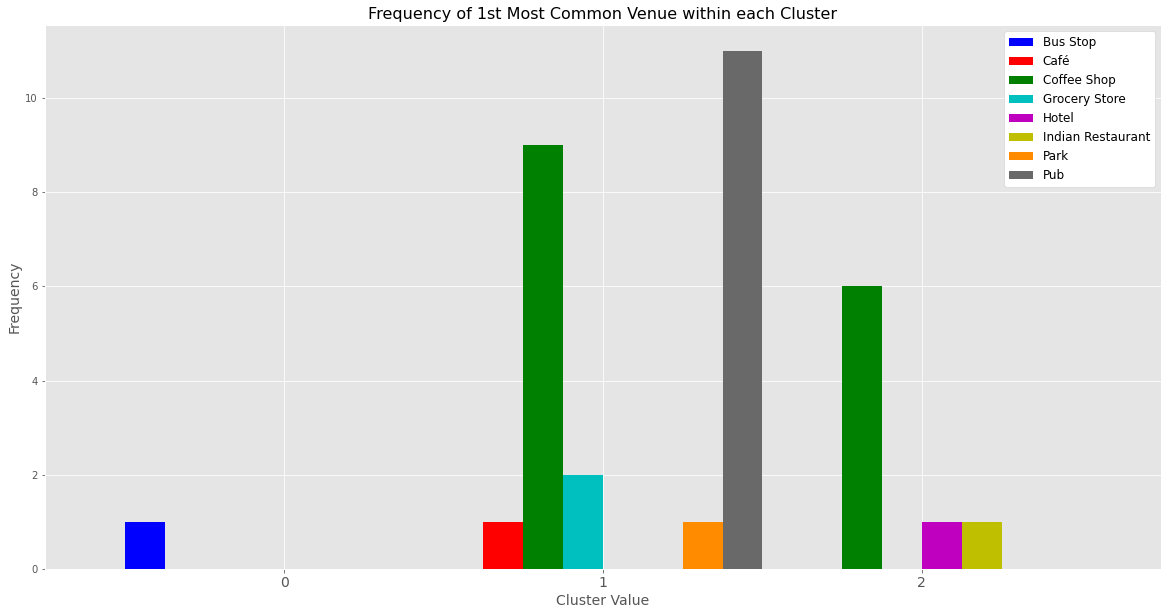

In [54]:
frame=most_common_pivot.plot(kind='bar', figsize=(20, 10), width = 1, color = ['b', 'r', 'g', 'c', 'm', 'y', 'darkorange', 'dimgrey', 'palegreen'])

plt.legend(labels=most_common_pivot.columns, fontsize= 12, facecolor='white', framealpha=1)
plt.title("Frequency of 1st Most Common Venue within each Cluster", fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Cluster Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.bar_width = 0.4

The above bar chart indicates that the 1st Most Common Venue generally tallies with where the clusters are located geographically.

Namely that:

+ Cluster 0 indicates a more atypical location that is further out with it's most common venue being a bus stop
+ Cluster 1 indicates an outer borough, with a more diverse range of venues found as first most common, but the majority being pubs followed by coffee shops
+ Cluster 2 indicates a centrally located borough with mostly coffee shops

We can look at the venues grouped under their clusters to see this more clearly: 

##### Cluster 0:

In [55]:
london_boroughs_clusters.loc[london_boroughs_clusters['Cluster Value'] == 0, london_boroughs_clusters.columns[[0] + list(range(5, london_boroughs_clusters.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Bus Stop,Turkish Restaurant,Supermarket,Discount Store,Golf Course,Soccer Field,Grocery Store,Gas Station,Gym / Fitness Center,Park


##### Cluster 1:

In [56]:
london_boroughs_clusters.loc[london_boroughs_clusters['Cluster Value'] == 1, london_boroughs_clusters.columns[[0] + list(range(5, london_boroughs_clusters.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,Pub,Park,Bus Stop,Fish & Chips Shop,Gym,Café,Electronics Store,English Restaurant,Escape Room,Exhibit
2,Bexley,Pub,Clothing Store,Fast Food Restaurant,Hotel,Supermarket,Coffee Shop,Pharmacy,American Restaurant,Nightclub,Pizza Place
4,Bromley,Pub,Clothing Store,Coffee Shop,Indian Restaurant,Supermarket,Café,Bar,Pizza Place,Electronics Store,Burger Joint
6,Croydon,Coffee Shop,Pub,Hotel,Platform,Clothing Store,Bookstore,Indian Restaurant,Italian Restaurant,Mediterranean Restaurant,Portuguese Restaurant
7,Ealing,Coffee Shop,Pub,Café,Italian Restaurant,Indian Restaurant,Thai Restaurant,Pizza Place,Park,Bakery,Hotel
8,Enfield,Pub,Coffee Shop,Clothing Store,Grocery Store,Italian Restaurant,Optical Shop,Supermarket,Fish & Chips Shop,Pharmacy,Department Store
9,Greenwich,Grocery Store,Pub,Clothing Store,Coffee Shop,Supermarket,Plaza,Bakery,Pharmacy,Gym / Fitness Center,Fast Food Restaurant
10,Hackney,Pub,Coffee Shop,Brewery,Café,Bakery,Park,Restaurant,Italian Restaurant,Modern European Restaurant,Butcher
11,Hammersmith and Fulham,Pub,Café,Indian Restaurant,Coffee Shop,Park,French Restaurant,Gym / Fitness Center,Japanese Restaurant,Italian Restaurant,Gastropub
12,Haringey,Pub,Café,Turkish Restaurant,Clothing Store,Fast Food Restaurant,Bakery,Grocery Store,Park,Chinese Restaurant,Coffee Shop


##### Cluster 2:

In [57]:
london_boroughs_clusters.loc[london_boroughs_clusters['Cluster Value'] == 2, london_boroughs_clusters.columns[[0] + list(range(5, london_boroughs_clusters.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Brent,Coffee Shop,Hotel,Bar,Clothing Store,Grocery Store,Pub,Pizza Place,Sporting Goods Shop,Indian Restaurant,American Restaurant
5,Camden,Coffee Shop,Café,Hotel,Bookstore,Park,Plaza,Breakfast Spot,Train Station,Science Museum,Burger Joint
16,Hounslow,Indian Restaurant,Coffee Shop,Grocery Store,Hotel,Fast Food Restaurant,Clothing Store,Supermarket,Bus Stop,Bakery,Discount Store
23,Newham,Hotel,Airport Service,Coffee Shop,Sandwich Place,Airport Terminal,Park,Light Rail Station,Bus Stop,Gym / Fitness Center,Chinese Restaurant
26,Southwark,Coffee Shop,Pub,Tapas Restaurant,Cocktail Bar,Hotel,Garden,Bakery,Seafood Restaurant,Scenic Lookout,Brewery
28,Tower Hamlets,Coffee Shop,Park,Hotel,Italian Restaurant,Light Rail Station,Bus Stop,Sandwich Place,English Restaurant,Lounge,Restaurant
31,Westminster,Coffee Shop,Hotel,Theater,Park,Café,Garden,Sushi Restaurant,Sandwich Place,Pub,Sporting Goods Shop
32,City of London,Coffee Shop,Gym / Fitness Center,Hotel,Cocktail Bar,Modern European Restaurant,Steakhouse,Falafel Restaurant,French Restaurant,Theater,Event Space


Based on the map of cluster locations, along with the above bar chart of Most Common 1st Venue found in each cluster, and finally eyeballing the boroughs found in each cluster, appropriate labels can be assigned to each cluster as follows:

- Cluster 0: "Atypical, non-hospitality"
- Cluster 1: "Pubs and coffee shops"
- Cluster 2: "Coffee shops & hotels"

Create new column in main dataframe with cluster description labels:

In [59]:
london_boroughs_clusters.loc[london_boroughs_clusters['Cluster Value'] == 0, 'Cluster Label'] = "Atypical, non-hospitality"
london_boroughs_clusters.loc[london_boroughs_clusters['Cluster Value'] == 1, 'Cluster Label'] = "Pubs and coffee shops"
london_boroughs_clusters.loc[london_boroughs_clusters['Cluster Value'] == 2, 'Cluster Label'] = "Coffee shops & hotels"
london_boroughs_clusters.head()

,Borough,Latitude,Longitude,TotalTrips,Cluster Value,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Label
0,Barking and Dagenham,51.5607,0.1557,1140,0,Bus Stop,Turkish Restaurant,Supermarket,Discount Store,Golf Course,Soccer Field,Grocery Store,Gas Station,Gym / Fitness Center,Park,"Atypical, non-hospitality"
1,Barnet,51.6252,-0.1517,7169,1,Pub,Park,Bus Stop,Fish & Chips Shop,Gym,Café,Electronics Store,English Restaurant,Escape Room,Exhibit,Pubs and coffee shops
2,Bexley,51.4549,0.1505,2490,1,Pub,Clothing Store,Fast Food Restaurant,Hotel,Supermarket,Coffee Shop,Pharmacy,American Restaurant,Nightclub,Pizza Place,Pubs and coffee shops
3,Brent,51.5588,-0.2817,3007,2,Coffee Shop,Hotel,Bar,Clothing Store,Grocery Store,Pub,Pizza Place,Sporting Goods Shop,Indian Restaurant,American Restaurant,Coffee shops & hotels
4,Bromley,51.4039,0.0198,4364,1,Pub,Clothing Store,Coffee Shop,Indian Restaurant,Supermarket,Café,Bar,Pizza Place,Electronics Store,Burger Joint,Pubs and coffee shops


#### 3.8  Categorising tourist trips data

When visualising the tourist trips data it will be useful to group each borough under different categories.

First, create a series with Total Trips:

In [60]:
total_trips = trips[['Borough', 'TotalTrips']]
total_trips.set_index('Borough', inplace=True)
total_trips = total_trips['TotalTrips'].sort_values(ascending=False)
total_trips

Borough
Westminster               55577
Kensington and Chelsea    15812
Camden                    13466
Southwark                  7835
Hammersmith and Fulham     7538
Barnet                     7169
Lambeth                    7002
Tower Hamlets              6502
Ealing                     6376
City of London             6362
Croydon                    5581
Hillingdon                 5294
Wandsworth                 4529
Bromley                    4364
Islington                  4277
Merton                     3857
Kingston upon Thames       3657
Hounslow                   3564
Havering                   3418
Enfield                    3278
Greenwich                  3240
Brent                      3007
Richmond upon Thames       2900
Newham                     2749
Haringey                   2567
Bexley                     2490
Redbridge                  2429
Harrow                     2261
Waltham Forest             2195
Sutton                     2089
Hackney                    2066


Create horizontal bar chart to display the data:

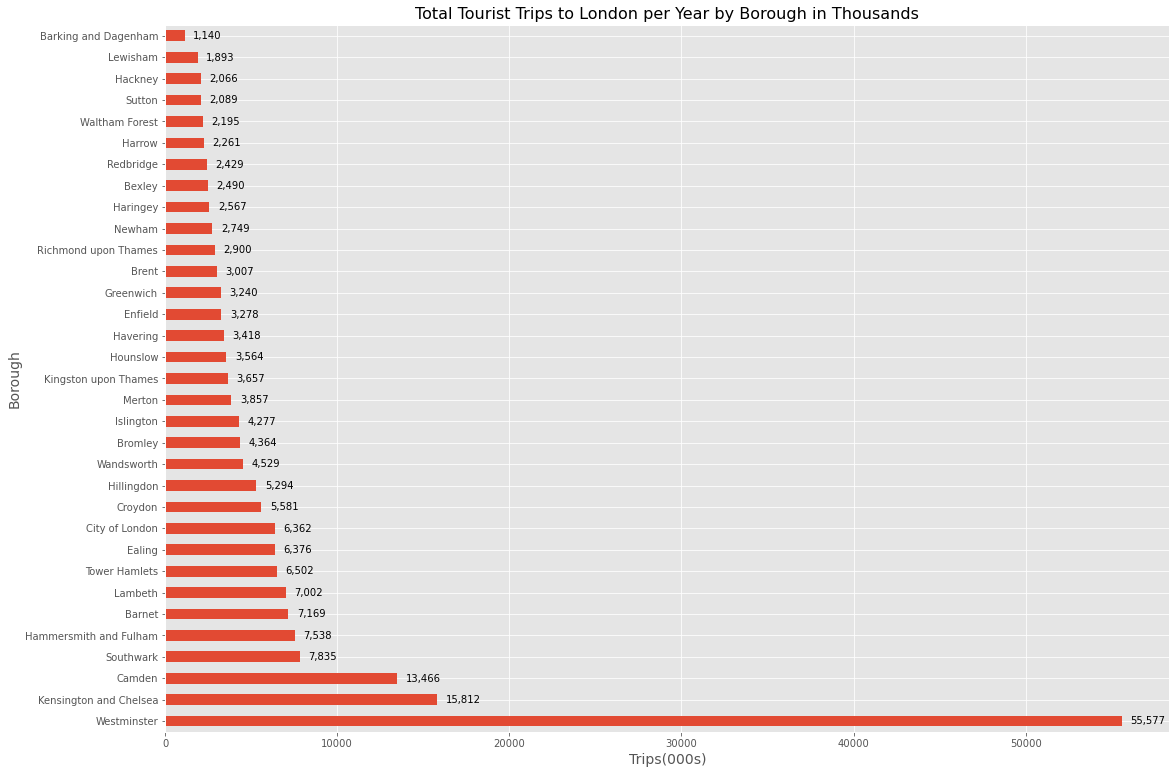

In [61]:
total_trips.plot(kind='barh', figsize=(18, 13)) 

plt.title('Total Tourist Trips to London per Year by Borough in Thousands', fontsize=16)
plt.ylabel('Borough', fontsize=14)
plt.xlabel('Trips(000s)', fontsize=14)

for index, value in enumerate(total_trips): 
    label = format(int(value), ',')
    plt.annotate(label, xy=(value + 500, index - 0.15), color='black')

plt.show()

Evidently, the number of trips for the majority of boroughs is between 1000 and 8000, with Westminster being an outlier.

This can be further ilustarted through a histogram:

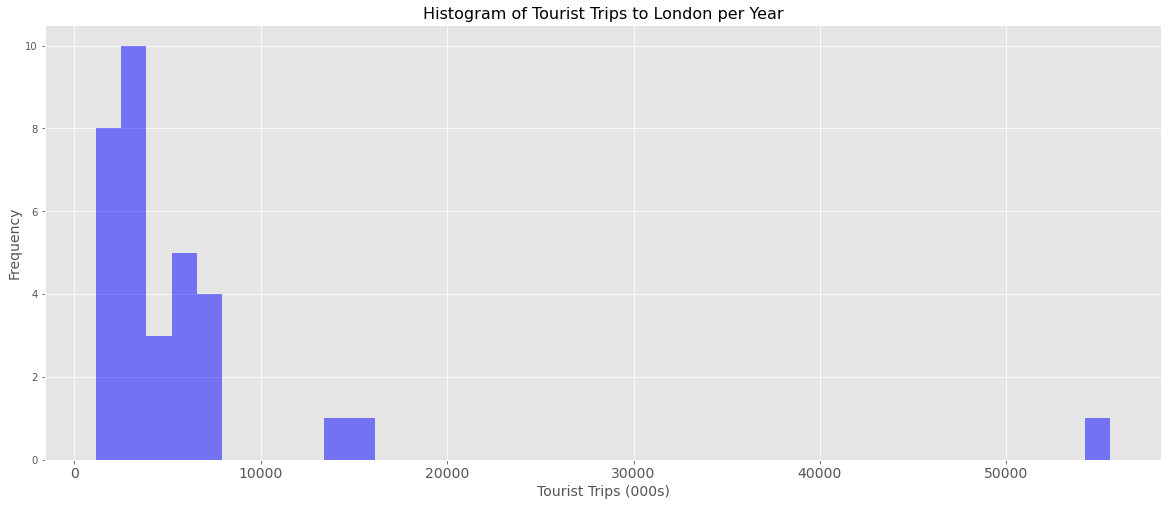

In [62]:
num_bins = 40
plt.figure(figsize=(20,8))
n, bins, patches = plt.hist(london_boroughs_clusters['TotalTrips'], num_bins, facecolor='blue', alpha=0.5)
plt.title("Histogram of Tourist Trips to London per Year",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Tourist Trips (000s)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

According to the charts, the popularity of different boroughs as tourist destinations can be defined as follows:

+ Below 3000: "Low"
+ 3000-5000: "Moderate"
+ 5000-8000: "High"
+ Above 8000: "Very High"

"Popularity" labels can be assigned based on these categories and then used for visualisation:

In [63]:
london_boroughs_clusters.loc[london_boroughs_clusters['TotalTrips'] < 3000, 'Popularity'] = "Very Low"
london_boroughs_clusters.loc[london_boroughs_clusters['TotalTrips'] > 2999, 'Popularity'] = "Moderate"
london_boroughs_clusters.loc[london_boroughs_clusters['TotalTrips'] > 4999, 'Popularity'] = "High"
london_boroughs_clusters.loc[london_boroughs_clusters['TotalTrips'] > 8000, 'Popularity'] = "Very High"
london_boroughs_clusters.head()

,Borough,Latitude,Longitude,TotalTrips,Cluster Value,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Label,Popularity
0,Barking and Dagenham,51.5607,0.1557,1140,0,Bus Stop,Turkish Restaurant,Supermarket,Discount Store,Golf Course,Soccer Field,Grocery Store,Gas Station,Gym / Fitness Center,Park,"Atypical, non-hospitality",Very Low
1,Barnet,51.6252,-0.1517,7169,1,Pub,Park,Bus Stop,Fish & Chips Shop,Gym,Café,Electronics Store,English Restaurant,Escape Room,Exhibit,Pubs and coffee shops,High
2,Bexley,51.4549,0.1505,2490,1,Pub,Clothing Store,Fast Food Restaurant,Hotel,Supermarket,Coffee Shop,Pharmacy,American Restaurant,Nightclub,Pizza Place,Pubs and coffee shops,Very Low
3,Brent,51.5588,-0.2817,3007,2,Coffee Shop,Hotel,Bar,Clothing Store,Grocery Store,Pub,Pizza Place,Sporting Goods Shop,Indian Restaurant,American Restaurant,Coffee shops & hotels,Moderate
4,Bromley,51.4039,0.0198,4364,1,Pub,Clothing Store,Coffee Shop,Indian Restaurant,Supermarket,Café,Bar,Pizza Place,Electronics Store,Burger Joint,Pubs and coffee shops,Moderate


As Westminster is an outlier with a much higher number of tourist trips, this can be accounted for by first capping it to 20000. This will allow for full variation between all the boroughs to be appreciated while maintaining Westminster to be the most popular borough in terms of tourism:

In [64]:
london_boroughs_clusters['TotalTripsCapped'] = london_boroughs_clusters['TotalTrips']
london_boroughs_clusters.at[31,'TotalTripsCapped']=20000
london_boroughs_clusters.tail()

,Borough,Latitude,Longitude,TotalTrips,Cluster Value,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Label,Popularity,TotalTripsCapped
28,Tower Hamlets,51.5099,-0.0059,6502,2,Coffee Shop,Park,Hotel,Italian Restaurant,Light Rail Station,Bus Stop,Sandwich Place,English Restaurant,Lounge,Restaurant,Coffee shops & hotels,High,6502
29,Waltham Forest,51.5908,-0.0134,2195,1,Pub,Café,Gym / Fitness Center,Art Gallery,Coffee Shop,Pizza Place,Brewery,Restaurant,Multiplex,Museum,Pubs and coffee shops,Very Low,2195
30,Wandsworth,51.4567,-0.1910,4529,1,Pub,Gym / Fitness Center,Grocery Store,Coffee Shop,Café,Park,Clothing Store,Breakfast Spot,Pizza Place,Asian Restaurant,Pubs and coffee shops,Moderate,4529
31,Westminster,51.4973,-0.1372,55577,2,Coffee Shop,Hotel,Theater,Park,Café,Garden,Sushi Restaurant,Sandwich Place,Pub,Sporting Goods Shop,Coffee shops & hotels,Very High,20000
32,City of London,51.5155,-0.0922,6362,2,Coffee Shop,Gym / Fitness Center,Hotel,Cocktail Bar,Modern European Restaurant,Steakhouse,Falafel Restaurant,French Restaurant,Theater,Event Space,Coffee shops & hotels,High,6362


Now the main dataframe contains information about the London boroughs pertaining to:

+ Borough names
+ Latitude and longitude values
+ Most common venues found
+ Cluster values based on k-means derived cluster values
+ Cluster labels giving description of the clusters
+ Tourist trips per year in thousands
+ Popularity labels according to tourist trips

This can be used to create visualisations in the Results section.

### 4. Results

#### 4.1 Visualisation of data using a choropleth map with borough markers and pop out labels

Download geo json data for London boroughs stored on my github, then save into a variable:

In [65]:
!wget --quiet https://raw.githubusercontent.com/jakehuntersmith/Coursera_Capstone/main/data/london_boroughs_geo.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [66]:
london_geo = r'london_boroughs_geo.json'

Create choropleth map based on tourist trip data and add coloured labels with cluster information to it:

In [71]:
london_combined_map = folium.Map(location=[latitude, longitude], zoom_start=10)

london_combined_map.choropleth(
    geo_data=london_geo,
    data=london_boroughs_clusters,
    columns=['Borough', 'TotalTripsCapped'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Tourist Trips',
    highlight=True
)

markers_colors = []
for lat, lon, poi, clustervalue, clusterlabel, popularity, in zip(
    london_boroughs_clusters['Latitude'], 
    london_boroughs_clusters['Longitude'], 
    london_boroughs_clusters['Borough'], 
    london_boroughs_clusters['Cluster Value'],
    london_boroughs_clusters['Cluster Label'],
    london_boroughs_clusters['Popularity'],
):
    label = folium.Popup(str(poi) + ", Cluster " + str(clustervalue) + ": " + str(clusterlabel) + ", " + str(popularity), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[clustervalue-1],
        fill=True,
        fill_color=rainbow[clustervalue-1],
        fill_opacity=0.7).add_to(london_combined_map)

london_combined_map

### 5. Discussion

The map indicates how the boroughs are clustered by the colour of the markers. A clear difference between more outer located, potentially suburban boroughs (Cluster 1 – purple markers) and more centrally located boroughs (Cluster 2 – light green markers) can be clearly observed. This geographical difference between these two clusters makes sense when considering the most commonly found venues within each. It can be seen that while both have a high number of coffee shops, Cluster 1 certainly has more pubs as the most common venue. On the other hand, The most common venue aside from coffee shops in Cluster 2 boroughs looks to be hotels. This makes sense as hotels are typically located centrally for easy access around a city and to visit tourist destinations.

It is also clear to note the difference in shading of the boroughs based on tourist trips. Very centrally located areas see more trips, which is to be expected when considering the tourist venues found in these locations such as Buckingham Palace and the Houses of Parliament. However, it is also notable that differences can be see between boroughs that are further out from central locations.

So, in answer the business problem of this project: where would be some ideal locations to open a new hospitality venue in London, specifically a craft beer bar?

I would argue that any borough where tourism is ‘High’ or ‘Very High’ according to the Popularity labels assigned would be a useful first criterion. Secondly, any boroughs that are also in Cluster 1 are likely to be viable locations due to hospitality venues, specifically pubs, already being commonly found there. This is likely to mean that a new craft beer bar would have a good chance of being successful with a good target audience already in place. A final consideration not fully explored here but nonetheless important is the cost of commercial rentals; it is likely to cheaper to rent a commercial space in Cluster 1 boroughs as they are less centrally located. Cost of premises is clearly an important consideration when opening a business.

A final list of suitable boroughs can therefore be created that is based on the above criteria:

1. Tourist trips: a ‘Popularity’ label of ‘High’ or ‘Very High’, indicating above 5000 tourist trips per year.

2. Location / commonly found venues: any boroughs belonging to Cluster 1, where a borough has a less central location and a majority of pubs in the area.

The main data frame can be filtered based on the above criteria to give us a final list of suitable boroughs:

In [67]:
suitable_boroughs = london_boroughs_clusters[(london_boroughs_clusters.TotalTrips > 4999 ) &
                                             (london_boroughs_clusters['Cluster Value'] == 1)]
suitable_boroughs

,Borough,Latitude,Longitude,TotalTrips,Cluster Value,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Label,Popularity,TotalTripsCapped
1,Barnet,51.6252,-0.1517,7169,1,Pub,Park,Bus Stop,Fish & Chips Shop,Gym,Café,Electronics Store,English Restaurant,Escape Room,Exhibit,Pubs and coffee shops,High,7169
6,Croydon,51.3714,-0.0977,5581,1,Coffee Shop,Pub,Hotel,Platform,Clothing Store,Bookstore,Indian Restaurant,Italian Restaurant,Mediterranean Restaurant,Portuguese Restaurant,Pubs and coffee shops,High,5581
7,Ealing,51.5130,-0.3089,6376,1,Coffee Shop,Pub,Café,Italian Restaurant,Indian Restaurant,Thai Restaurant,Pizza Place,Park,Bakery,Hotel,Pubs and coffee shops,High,6376
11,Hammersmith and Fulham,51.4927,-0.2339,7538,1,Pub,Café,Indian Restaurant,Coffee Shop,Park,French Restaurant,Gym / Fitness Center,Japanese Restaurant,Italian Restaurant,Gastropub,Pubs and coffee shops,High,7538
15,Hillingdon,51.5441,-0.4760,5294,1,Coffee Shop,Pub,Clothing Store,Fast Food Restaurant,Pharmacy,Gym,Italian Restaurant,Grocery Store,Department Store,Park,Pubs and coffee shops,High,5294
18,Kensington and Chelsea,51.5020,-0.1947,15812,1,Café,Restaurant,Pub,Italian Restaurant,Juice Bar,Clothing Store,Garden,Coffee Shop,Bakery,Hotel,Pubs and coffee shops,Very High,15812
20,Lambeth,51.4607,-0.1163,7002,1,Coffee Shop,Pub,Caribbean Restaurant,Pizza Place,Cocktail Bar,Beer Bar,Tapas Restaurant,Market,Yoga Studio,Music Venue,Pubs and coffee shops,High,7002


### 6. Conclusion

#### 6.1 Summary

This study has demonstrated the usefulness of several data science techniques. Web scraping using Beautiful Soup is a useful method of efficiently sourcing publicly available data. Foursquare is a valuable API that can access useful location data. Folium is a great map builder with the flexible to combine different types of information into powerful visualisations. The K-Means method of clustering is a machine learning technique that can successfully segment a dataset and provide valuable insights into the similarity of different locations. The approach taken has helped to successfully narrow down multiple locations in a large city to a shortlist of contenders, in this case as potentially ideal locations to open a new hospitality business. Therefore, to a reasonable extent the business problem set out in the Introduction section has been addressed.

The interactive map created in this study is likely to be of use to anybody with an aim of entering the hospitality industry. They would have the ability to study different areas and get an initial impression of the most and least suitable areas to locate their business. Equally someone who already runs a hospitality-based business and desires to expand into other London locations would find value.

Tourists visiting London would be another population who could find this project useful; they can quickly discern the ideal places to visit based on their trip requirements, particularly where time is limited.

Finally, it could also be of interest to those wishing to move to London or somewhere else in the city if already a resident. Knowing the typical types of venues found at each location can save time for someone who has a good idea of what they want to live near.

#### 6.2 Future research

While this study has provided some useful insights, it is important to recognise where improvements could be made and any future directions for subsequent research. An obvious improvement would be to integrate even more information to help answer the business problem - when deciding where to open a bar there are certainly other relevant factors to consider. One factor could be the average cost of a commercial letting in each borough. For example, while Kensington & Chelsea is on the shortlist, it being in Cluster 1 and having a ‘Very High’ tourist label, it is likely to have extremely expensive commercial rental rates, making it potentially less viable as a location to start a hospitality business.

Knowing more about the demographic make-up residents in each borough would also be valuable to know; one might assume that boroughs with a lower average age are likely to generate more business based on an increased orientation towards more socially focused venues such as pubs and bars.

### References
<p>
[1] Wikipedia – London: https://en.wikipedia.org/wiki/London <p>
[2] Wikipedia – London boroughs: https://en.wikipedia.org/wiki/List_of_London_boroughs <p>
[3] Foursquare API: https://developer.foursquare.com/ <p>
[4] UK Government data site - tourism trips to London boroughs: https://data.gov.uk/dataset/ee5038be-d2be-4ab6-a612-70ade60eca12/tourism-trips-borough <p>
[5] London Data Store - geo json data for London boroughs: https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london?resource=9ba8c833-6370-4b11-abdc-314aa020d5e0 
